<center><img src="img/skillfactorylogo.png"></center>

<h1><center>Курс "Практический Machine Learning"</center></h1>
<h3><center>Шестаков Андрей</center></h3>
<hr>
<h2><center>Введение в анализ сетевых структур</center></h2>

In [3]:
import igraph as ig
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
from IPython.display import Image, display


%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,8)

/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [4]:
import warnings
warnings.filterwarnings('ignore')

from ipywidgets import interact, IntSlider, fixed, FloatSlider

# Сети везде

<img src='img/fb.jpg'>

<img src='img/left-right.png'>

<img src='img/power_exchanges_europes.png'>

<img src='img/fin.jpg'>

<img src='img/karate.jpg'>

<img src='img/milgram.jpg'>

Six degrees of [Kevin Bacon](https://bacon.mybluemix.net/)

## Почему сети интересно изучать?
* Неслучайные и нерегулярные 
* Безмасштабность (scale-free) 
* Общие свойства в разных дисциплинах
* Дополнительный источник (топологической) информации

## Если мы все успеем, то мы с вами разберем 
* Что такое сети с формальной точки зрения
* Основные форматы хранения
* Экскурс в библиотеки
* Как оценить важность элементов сети
* Как оценить похожесть элементов сети

# Графы

**Граф** - математическая модель представления сетевых структур. Впредь в курсе слова  *сеть* и *граф* будут обозначать одно и тоже.

Графом $\mathcal{G}$ называется пара множеств $\mathcal{G} = (V, E)$, где $V$ содержит в себе множество *вершин (узлов, vertices, nodes)*, а $E$ содержит множество *ребер (связей, edges, links)*. <br/> 
Величины $n = |V|$ и $m = |E|$ называют *порядком (order of graph)* и *размером (size of graph)* графа. <br/> 


**Ребра, ориентированность, соседи**
* Ребро между вершинами $(v_i, v_j)$ обозначают $e_{ij}$. В нериентированном графе $e_{ij} = e_{ji}$ $\forall i,j$. <br/>
* В ориенированном графе ребро $e_{ij} = (v_i, v_j)$ показывает направление связи от $v_i$ к $v_j$.  <br/>
* Иногда ребрам в графе ставится в соответствие некоторое числовое значение $w_{ij} \in \mathbb{R}$, которое выражает силу связи между вершинами. Эти значения называют весами ребер, а графы с весами называют взвешенными. <br/>
* Вершины $v_i$ и $v_j$ называют соседями если ребро $(v_i, v_j) \in E$. Множество смежных с $v_i$ вершин образуют множество соседей $N(v_i)$. Степень вершины - количество соседей $k_i = |N(v_i)|$<br/>


<img src='./img/clique_init.png' width="550"/>

Граф сверху:
* Неориентированный
* Невзвешенный
* Cвязный
* Подграф $\mathcal{G'}$ состоящий из вершин $v_1, \dots, v_5$ - полный подграф графа $\mathcal{G}$
* $V = \{v_1, \dots, v_{10} \}, |V| = 10$
* $E = \{(v_1, v_2), (v1, v3), \dots, (v_9, v_{10}) \}, |E| = ?$
* $N(v_2) = \{v_1, v_3, v_4, v_5, v_6, v_8\}$
* Степень вершины $v_2$: $k_2 = |N(v_2)| =  6$
* Расстояние между $v_5$ и $v_{7} = ?$

# Форматы представления графов

Форматов представления графов довольно много. Все форматы определяют топологию сети (т.е. её структуру), но некоторые могут не сохранять в себе все данные связанные с элементами сети (множество атрибутов ребер и вершин, динамические характеристики, рекоментованную прорисовку и тп).

Ниже мы рассмотрим наиболее распространенные форматы.

## Матрица смежности

Матрица связанности, Incidence matrix, Association matrix.

Матрица связанности - это квадратная матрица размера $n \times n$. Обозначим ее буквой $\mathbf{A}$ <br/>

**В невзвешенном графе:**<br/>
$\mathbf{A_{ij}} = 1$, если в графе есть ребро между вершинами $v_i$ и $v_j$ <br/>
$\mathbf{A_{ij}} = 0$, иначе

**Во взвешенном графе:**<br/>
$\mathbf{A_{ij}} = w_{ij}$, если в графе есть ребро между вершинами $v_i$ и $v_j$ <br/>
$\mathbf{A_{ij}} = 0$, иначе

Для графа выше матрица смежности имеет следующий вид:

<img src='./img/clique_matrix.png'/>

**Преимущества:**
* Наглядность
* Удобно производить математические операции

**Недостатки:**
* Передает только структурную информацию (+ веса)
* При неправильном хранении может занимать много места в памяти и на жестком диске

## Список ребер

Edge list

Другой очевидный и популярный формат.

На каждой строчке указываются идентификаторы смежных вершин (числовые признаки этих связей - веса)

**Преимущества:**
* Достаточно легкий формат

**Недостатки:**
* Передает структурную информацию
* Может передавать несколько признаков связей (несколько весов)

## Список смежности

Adjacency list

Один из самых экономичных форматов. 

Каждая строчке соответствует вершине. Через запятую указываются идентификаторы смежных с ней вершин

**Преимущества:**
* Достаточно легкий формат

**Недостатки:**
* Передает только структурную информацию

## Pajek формат

Данный формат используется в программе для анализа больших сетей - [Pajek](http://mrvar.fdv.uni-lj.si/pajek/).
По сути это немного расширенный формат списка ребер (или списка смежности).

**Преимущества:**
* Поддерживаются комментарии
* Оптимальный формат хранения информации о ребрах и вершинах

**Недостатки:**
* ...

## GraphML

Довольно "толстый" формат хранения данных, основанный на языке разметки XML. Представляет их себя набор тэгов, которые могут описать в сети абсолютно все.

**Преимущества:**
* Возможно передать всю информацию о графе, его структуре и характеристиках элементов

**Недостатки:**
* Много весит...

## GML

GML (Graph Modelling Language) - так же гибкий формат представления графов. Однако он является чуть более "читабельным", чем GraphML

**Преимущества:**
* Возможно передать всю информацию о графе, его структуре и характеристиках элементов

**Недостатки:**
* Много весит...

# Инструменты по работе с сетями

## Gephi

[Gephi](https://gephi.org/) - это очень крутой, недавно возрожденный, кнопочный, написанный на  Java, open-source проект для анализа и визуализации сетей. <br/> Вместо тысячи слов:

In [4]:
from IPython.display import VimeoVideo
VimeoVideo('9726202')

## Pajek

[Pajek](http://mrvar.fdv.uni-lj.si/pajek/) - так же большой и популярный проект.
* Поддерживается академическими сообществами c 1996 года
* Применяется для работы с действительно большими сетями: *"The highest possible number of vertices that Pajek64-XXL can handle increased to 1.999.999.997 (for ordinary Pajek the limit stays 999.999.997"*
* Довольно много доступных туториалов
* Открыт для некоммерческого использования ;)
* Работает только под Windows =( (под Linux и Mac с некоторыми извращениями)

<img src='http://wiki.cns.iu.edu/download/attachments/1245862/pajek1.jpg?version=1&modificationDate=1360781227075&api=v2'>

<img src='http://wiki.cns.iu.edu/download/attachments/1245862/paek9jpg.jpg?version=1&modificationDate=1360781528235&api=v2'>

## Распределенные вычисления на графах

Есть решения для работы с графами с помощью распределенных вычислений, например [Spark GraphX](http://spark.apache.org/graphx/)

## Библиотеки для работы с сетями на Python

В языке `python` чаще всего используются следующие библиотеки:
* `NetworkX` - подходит для работы с небольшими сетями
* [`graph-tool`](https://graph-tool.skewed.de/) - Библиотека для работы с большими сетями при поддержке OpenMP и Boost c API для `python`
* [SNAP](http://snap.stanford.edu/snappy/index.html) - Библиотека от Stanford для работы с большими сетями с API для `python`
* [`igraph`](http://igraph.org/python/) - Библиотека для работы с большими сетями c API для `python`  и `R`

FYI, можно посмотреть [бенчмарки](https://graph-tool.skewed.de/performance) для библиотек.

# Введение в igraph

In [1]:
# Утилька для рисования графов с лейблами
def plot_graph(g, settings=dict()):
    ig.plot(g, 'graph.png', **settings)
    display(Image(filename='graph.png'))

## Создадим граф

In [5]:
g = ig.Graph()

In [6]:
g

In [7]:
print(g)

IGRAPH U--- 0 0 --


In [8]:
# Аттрибуты графа
g['name'] = 'our first graph'
print(g)

IGRAPH U--- 0 0 -- our first graph
+ attr: name (g)


In [9]:
g.is_directed()

False

## Добавим вершины

In [10]:
g.add_vertices(5)
print(g)

IGRAPH U--- 5 0 -- our first graph
+ attr: name (g)


In [11]:
g.vcount()

5

## Добавим ребра

In [12]:
g.add_edge(0, 1)
print(g)

IGRAPH U--- 5 1 -- our first graph
+ attr: name (g)
+ edges:
0--1


In [13]:
g.add_edges([(0,2), (1,3), (4,3), (1,2), (2,2), (3,2)])
print(g)

IGRAPH U--- 5 7 -- our first graph
+ attr: name (g)
+ edges:
0 -- 1 2         2 -- 0 1 2 2 3   4 -- 3
1 -- 0 2 3       3 -- 1 2 4


In [14]:
g.ecount()

7

In [15]:
# Сейчас будет ошибка
g.add_edge(0, 6)

InternalError: Error at type_indexededgelist.c:272: cannot add edges, Invalid vertex id

## Различные операции с вершинами и ребрами

**Через `.vs` мы можем производить операции с вершинами и вычислять их различные характеристики**

In [16]:
g.vs.indices

[0, 1, 2, 3, 4]

In [17]:
g.vs.degree()

[2, 3, 5, 3, 1]

Ребрам можно задавать различные атрибуты (читай "признаки")

In [18]:
g.vs['label'] = ['v_%d' % (i+1) for i in range(g.vcount())]

In [19]:
g.vs.attribute_names()

['label']

In [20]:
g.vs['label']

['v_1', 'v_2', 'v_3', 'v_4', 'v_5']

In [21]:
g.vs[0,1]

In [22]:
g.vs[0,1]['label']

['v_1', 'v_2']

Удалять атрибуты тоже легко:

In [23]:
del g.vs['label']

In [24]:
g.vs.attribute_names()

[]

**Аналогично, через `.es` мы работаем с ребрами**

In [25]:
g.es.indices

[0, 1, 2, 3, 4, 5, 6]

In [26]:
g.es.is_loop()

[False, False, False, False, False, True, False]

In [27]:
print('Это ребро из вершины %d в вершину %d ' % (g.es[0].source, g.es[0].target))

Это ребро из вершины 0 в вершину 1 


Вершины и ребра можно выбирать в соответствии с заданными критериями

In [28]:
g.es.select(_from = 1).indices
g.es(_from = 1).indices

[2, 4]

In [29]:
g.vs(_degree_gt = 2).indices

[1, 2, 3]

Создадим атрибут у вершин и выберем подгруппу, удовлетворяющую определенному условию

In [30]:
g.vs['number'] = np.random.randint(10, 20, size=g.vcount())

In [31]:
g.vs['number']

[16, 19, 12, 13, 16]

In [32]:
# number < 15
g.vs(number_le = 15).indices

[2, 3]

## Объединение графов

In [33]:
g1 = g.copy()
g2 = ig.Graph.Erdos_Renyi(5, 0.3)

In [34]:
print(g1)
print('=' * 10)
print(g2)

IGRAPH U--- 5 7 -- our first graph
+ attr: name (g), number (v)
+ edges:
0 -- 1 2         2 -- 0 1 2 2 3   4 -- 3
1 -- 0 2 3       3 -- 1 2 4
IGRAPH U--- 5 4 --
+ edges:
0--1 0--2 1--3 2--3


In [35]:
g3 = g1 + g2
print(g3)

IGRAPH U--- 10 11 --
+ edges:
0--1 0--2 1--3 3--4 1--2 2--2 2--3 5--6 5--7 6--8 7--8


Создадим граф, который был изображен в самом верху этой секции notebook. 

Hint:<br/>
* команда `Graph.Full(n)` создает клику размера `n`

In [36]:
g = ig.Graph.Full(6)

g.add_vertices(4)
g.add_edges([(6,8), (6,7), (7,8), (8,9), (9,7)])

g.add_edges([(2,6), (1,7), (5,9)])

In [37]:
g.vs['label'] = ['v_{}'.format(i) for i in range(g.vcount())]

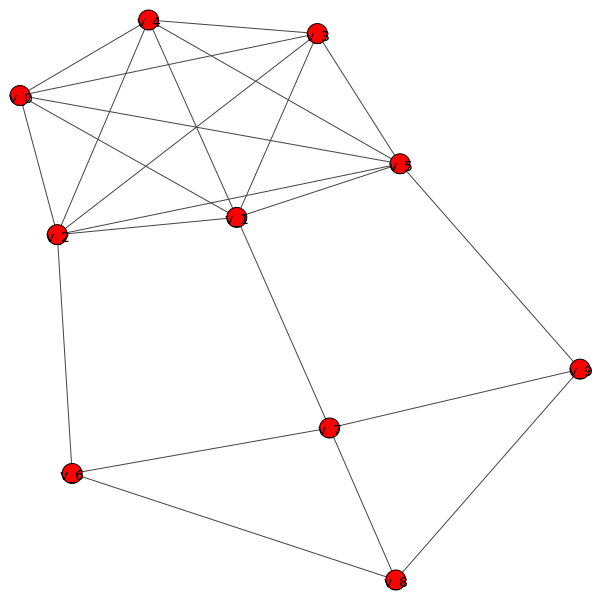

In [38]:
plot_graph(g)

In [39]:
ig.plot(g) # version incompatibility, it needs > 0.7.1.1

AttributeError: 'bytes' object has no attribute 'encode'

Выведем матрицу смежности, список смежности и список ребер этого графа

In [40]:
A = g.get_adjacency().data
A

[[0, 1, 1, 1, 1, 1, 0, 0, 0, 0],
 [1, 0, 1, 1, 1, 1, 0, 1, 0, 0],
 [1, 1, 0, 1, 1, 1, 1, 0, 0, 0],
 [1, 1, 1, 0, 1, 1, 0, 0, 0, 0],
 [1, 1, 1, 1, 0, 1, 0, 0, 0, 0],
 [1, 1, 1, 1, 1, 0, 0, 0, 0, 1],
 [0, 0, 1, 0, 0, 0, 0, 1, 1, 0],
 [0, 1, 0, 0, 0, 0, 1, 0, 1, 1],
 [0, 0, 0, 0, 0, 0, 1, 1, 0, 1],
 [0, 0, 0, 0, 0, 1, 0, 1, 1, 0]]

Сохраним что-нибудь из этого:

In [41]:
# g.write_edgelist('graph.edglist')
g.write_gml('graph.gml')

In [42]:
!head graph.gml

Creator "igraph version 0.7.1 Wed Aug  8 23:10:58 2018"
Version 1
graph
[
  directed 0
  node
  [
    id 0
    label "v_0"
  ]


# Соц-сеть друзей

In [43]:
g = ig.Graph()

filename = './data/network.gml'
g = g.Read_GML(filename)

In [44]:
print(g)

IGRAPH U--- 142 713 --
+ attr: agerank (v), id (v), label (v), sex (v)
+ edges:
  0 --
  1 --   5  10  17  18  25  26  31  47  53  85 110 114 129 134
  2 --   6  22  24  28  29  33  35  36  37  57  70  73  78  80  82  92  97 113
119 124
  3 --   4  19  31  83  85 123 130
  4 --   3  10  13  17  18  19  31  40  83  85 129 134
  5 --   1  17  18  19  26  45  47  53  85 110 114 129 134
  6 --   2   9  14  22  28  29  33  35  38  44  52  64  80  82 124 127 128
  7 --  47  85 100
  8 -- 116
  9 --   6  29  35  78 119 120 124
 10 --   1   4  13  16  17  18  26  47  50  53  85 100 110 114 129 130 134
 11 --  41  60 111
 12 --  42  62  68 102 108 137
 13 --   4  10  19  31  83
 14 --   6  15  22  29  37  39  44  46  52  54  59  64  67  69  71  75  82  84
88  89  92  94  96 104 115 128 133
 15 --  14  43  46  54  59  67  69  71  75  88  89  94  96 104 115
 16 --  10  17  18  25  45  47  50  58  85 100 110 130 134 140
 17 --   1   4   5  10  16  18  25  31  32  47  50  53  58  85 100 110 114 129

In [45]:
g.vertex_attributes()

['id', 'label', 'sex', 'agerank']

In [46]:
g.vs['sex']

['male',
 'male',
 'male',
 'male',
 'female',
 'male',
 'male',
 '',
 'female',
 'female',
 'female',
 'male',
 'female',
 'female',
 'female',
 'female',
 'male',
 'male',
 'male',
 'male',
 'male',
 'male',
 '',
 'female',
 'female',
 'male',
 'male',
 'female',
 'female',
 'male',
 'female',
 'male',
 'female',
 'male',
 'female',
 'female',
 'male',
 'male',
 'female',
 'male',
 'female',
 'female',
 'female',
 'male',
 'male',
 'female',
 'female',
 'male',
 'female',
 'male',
 'female',
 'female',
 'female',
 'female',
 'female',
 'male',
 'male',
 'female',
 'female',
 'female',
 'male',
 'female',
 'male',
 'male',
 'female',
 'female',
 'female',
 'male',
 'male',
 'male',
 'female',
 'female',
 'male',
 'female',
 'male',
 'male',
 'female',
 'male',
 'female',
 'female',
 'male',
 'male',
 'female',
 'male',
 'male',
 'male',
 'female',
 'female',
 'female',
 'female',
 'male',
 'female',
 'female',
 'male',
 'female',
 'female',
 'male',
 'female',
 'female',
 'male',
 'fe

In [47]:
## Нарисовать граф, так чтобы цвет вершины показывал пол человека
color = {'male': 'green', 'female': 'red', '': 'blue'}

In [48]:
vertex_color = [color.get(s) for s in g.vs['sex']]

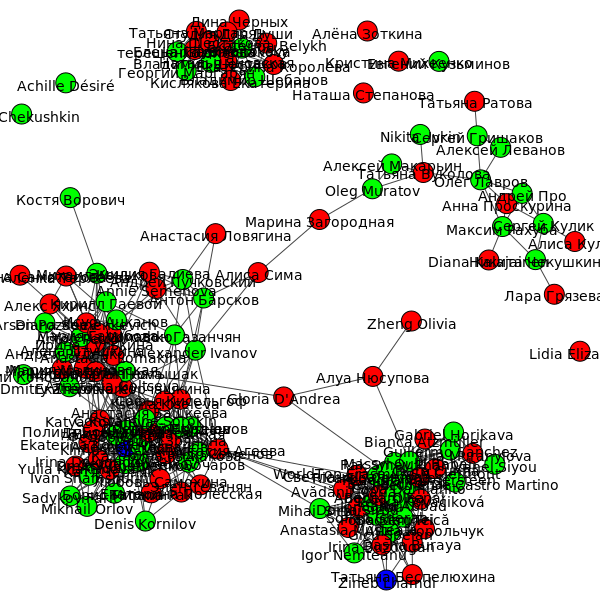

In [49]:
plot_graph(g, settings={'vertex_color': vertex_color})

# Характеристики вершин/ребер сети

На основе сетевой структуры для вершин и ребер можно расчитать характеристики "важности" этих элементов.

Они еще называются "центральностями"

In [50]:
import networkx as nx

In [51]:
g_nx = nx.karate_club_graph()

In [52]:
g_nx.number_of_edges()

78

In [53]:
g_nx.number_of_nodes()

34

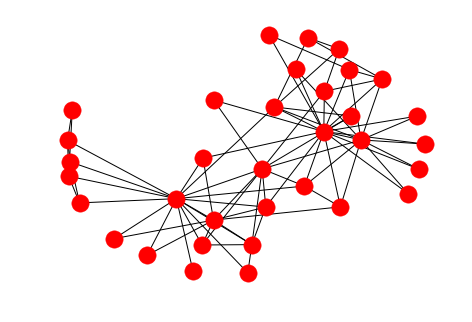

In [54]:
nx.draw(g_nx)

In [55]:
g = ig.Graph.Famous('Zachary')
graph_layout = g.layout_fruchterman_reingold()

vision_settings = dict()
vision_settings['layout'] = graph_layout
vision_settings['vertex_label'] = range(1,35)

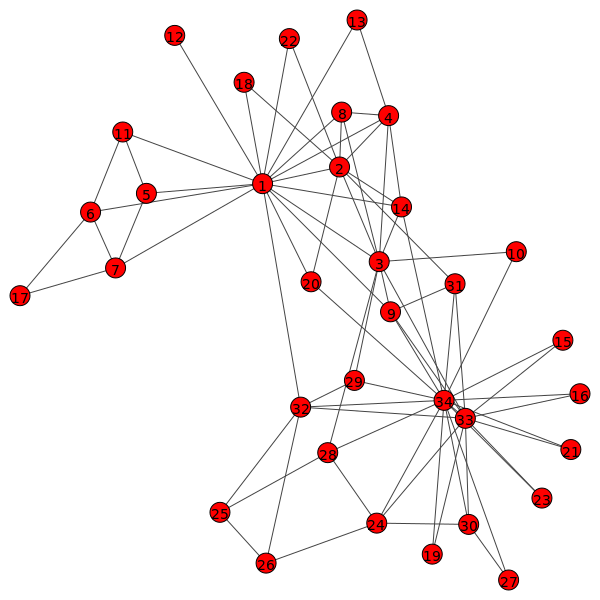

In [56]:
plot_graph(g, settings=vision_settings)

## Degree centrality

Самая оцевидная центральность - просто степень узла. Характеризует некоторую популярность узла (много друзей, много связей).

$$ C_d(i) = k(i) = \sum_jA_{ij} = \sum_iA_{ij}$$
$$ \bar{C}_d(i) = \frac{1}{n-1} C_d(i)$$

Существует обобщение на ориентированные (prestige) и взвешенные сети.

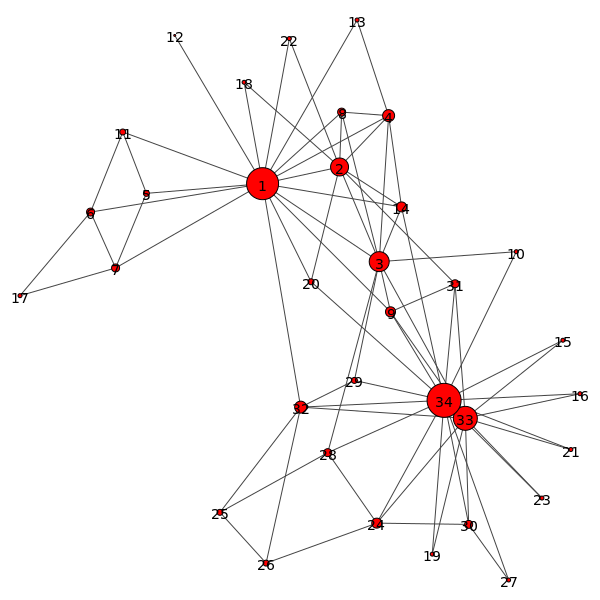

In [57]:
degr = g.degree()
vision_settings['vertex_size'] = np.array(degr) * 2

plot_graph(g, settings=vision_settings)

In [58]:
# в networkx
degr = g_nx.degree()
degr_cent = nx.centrality.degree_centrality(g_nx)

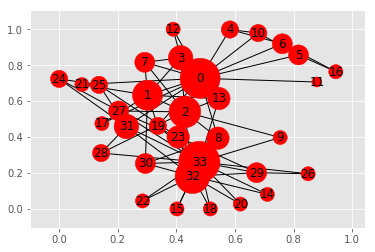

In [59]:
degr = np.array(list(degr.values())) * 100
nx.draw_networkx(g_nx, node_size=degr)

## Closeness centrality

Центральность, основанная на расстоянии до остальных вершин в графе.

$$ C_{cl}(i) = \frac{1}{\sum_j d(i,j)} $$

$$ \bar{C}_{cl}(i) = (n-1) \cdot C_{cl}(i) $$

Актор, расположенный в центре сети может быстро добраться до остальных акторов. Акторы на периферии расположены дальше.

**Вопрос:** что будет, если граф окажется несвязным?

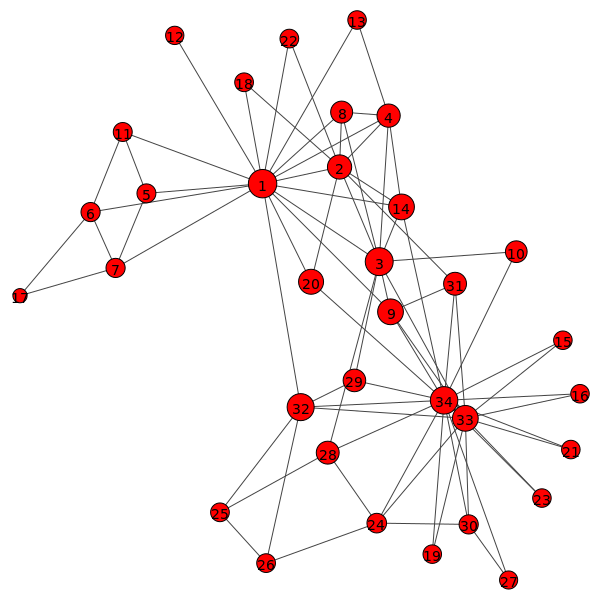

In [63]:
close = g.closeness(normalized=True)
vision_settings['vertex_size'] = np.array(close) * 50

plot_graph(g, settings=vision_settings)

In [64]:
closeness = nx.centrality.closeness_centrality(g_nx)

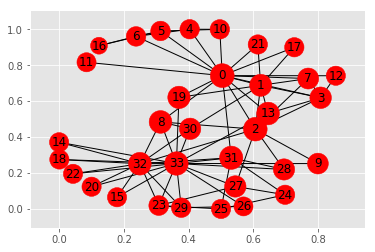

In [65]:
closeness = np.array(list(closeness.values())) * 1000
nx.draw_networkx(g_nx, node_size=closeness)

## Betweenness centrality (nodes)

Пусть $\sigma_{st}$ - количество кратчайших путей между вершинами $s$ и $t$, а $\sigma_{st}(i)$ - кр. пути между $v_s$ и $v_t$, которые проходят через вершину $v_i$.

Тогда 
$$ C_b(i) = \sum\limits_{s\neq t\neq i} \frac{\sigma_{st}(i)}{\sigma_{st}} $$

$$ \bar{C}_b(i) = \frac{2}{(n-1)(n-2)}C_b(i) $$

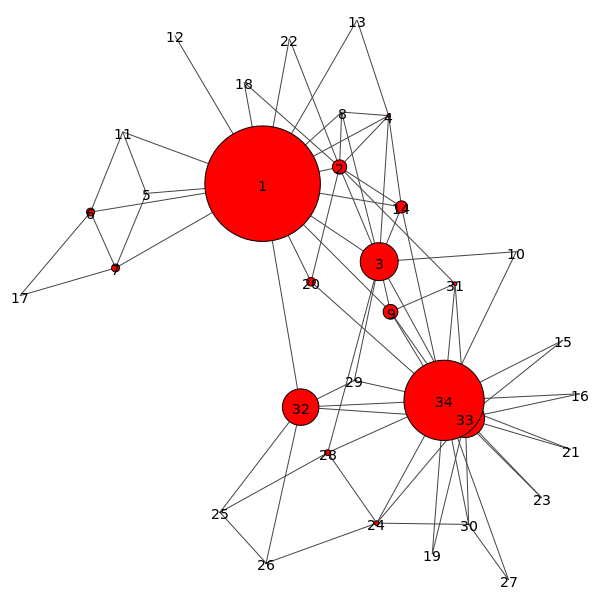

In [66]:
betw = np.array(g.betweenness(directed=False))
vision_settings['vertex_size'] = betw / 2 

plot_graph(g, settings=vision_settings)

## Betweenness centrality (edges)

Betweenness также можно расчитывать для ребер! Давайте определим для каких ребер она наибольшая и что это может нам дать?

In [67]:
betw_edg = nx.centrality.edge_betweenness_centrality(g_nx)

In [68]:
betw_edg = g.edge_betweenness(directed=False)

In [84]:
betw_edg

[14.166666666666664,
 43.638888888888886,
 11.5,
 29.333333333333332,
 43.83333333333333,
 43.833333333333336,
 12.80238095238095,
 41.64841269841271,
 29.333333333333332,
 33.0,
 26.099999999999994,
 23.77063492063493,
 22.509523809523817,
 25.770634920634926,
 22.509523809523813,
 71.39285714285714,
 13.033333333333335,
 4.333333333333333,
 4.164285714285714,
 6.959523809523811,
 10.490476190476187,
 8.20952380952381,
 10.490476190476189,
 18.10952380952381,
 12.583333333333332,
 14.145238095238092,
 23.10873015873016,
 12.780952380952376,
 38.70158730158729,
 17.28095238095238,
 5.147619047619047,
 4.28095238095238,
 1.8880952380952383,
 6.899999999999997,
 8.37142857142857,
 2.6666666666666665,
 1.6666666666666665,
 1.6666666666666667,
 2.6666666666666665,
 16.5,
 16.5,
 5.5,
 17.077777777777776,
 22.684920634920633,
 16.614285714285714,
 38.04920634920634,
 13.511111111111113,
 19.488888888888887,
 13.511111111111113,
 19.488888888888887,
 13.511111111111113,
 19.488888888888887,


In [69]:
# igraph
sources = []
targets = []
for e in g.es:
    sources.append(e.source)
    targets.append(e.target)
df = pd.DataFrame({'source': sources, 
                   'target': targets,
                   'betw': betw_edg})

In [70]:
df.sort_values('betw', ascending=False).head()

,source,target,betw
15,0,31,71.392857
5,0,6,43.833333
4,0,5,43.833333
1,0,2,43.638889
7,0,8,41.648413


## Page Rank

Идея PageRank заключается в попытке описать блуждание по вершинам графа. Вероятность перехода в вершину $v_i$ обратнопропорциональна степеням входящих связанных с ней вершин.

$$p^{t+1} = (D^{-1}A)^\top p^t = P^\top p^t$$

Помимо случайного блуждания между соседними вершинами заложен механизм "телепорта" между случайными вершинами с вероятностью $1-\alpha$.

$$ \mathbb{P} = \alpha P + \frac{(1 - \alpha)}{n} E,$$
где $E$ - это матрица состоящая из единиц.

Аналогичным образом решается задача на поиск собственного числа

$$\mathbb{P}^\top p = \lambda p$$

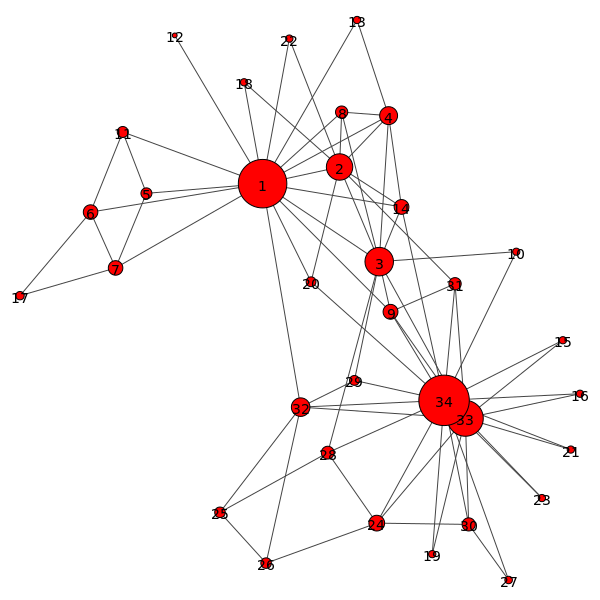

In [71]:
pr = g.pagerank(directed=False)
vision_settings['vertex_size'] = np.array(pr) * 500

plot_graph(g, settings=vision_settings)

## "Геометрическая" центральность

Eccentricity - максимальная длина кратчайшего пути из вершины $i$ до всех остальных вершин $e(i) = \max\limits_j d(i, j)$.

Диаметр - $\max e(i)$<br/>
Радиус - $\min e(i)$

Центральными вершинами являются те, у которых $e(i)$ равна радиусу графа

In [72]:
print(g.radius())
print(g.diameter())

3.0
5


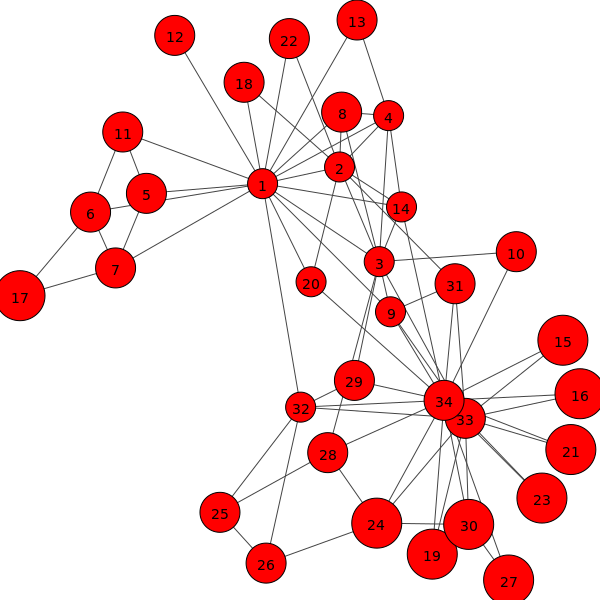

In [73]:
ecc = g.eccentricity()
vision_settings['vertex_size'] = np.array(ecc) * 10

plot_graph(g, settings=vision_settings)

### Clustering coefficient

Доля "треугольников" в окресности вершины.

In [74]:
# nx.transitivity(g_nx)
nx.triangles(g_nx)

{0: 18,
 1: 12,
 2: 11,
 3: 10,
 4: 2,
 5: 3,
 6: 3,
 7: 6,
 8: 5,
 9: 0,
 10: 2,
 11: 0,
 12: 1,
 13: 6,
 14: 1,
 15: 1,
 16: 1,
 17: 1,
 18: 1,
 19: 1,
 20: 1,
 21: 1,
 22: 1,
 23: 4,
 24: 1,
 25: 1,
 26: 1,
 27: 1,
 28: 1,
 29: 4,
 30: 3,
 31: 3,
 32: 13,
 33: 15}

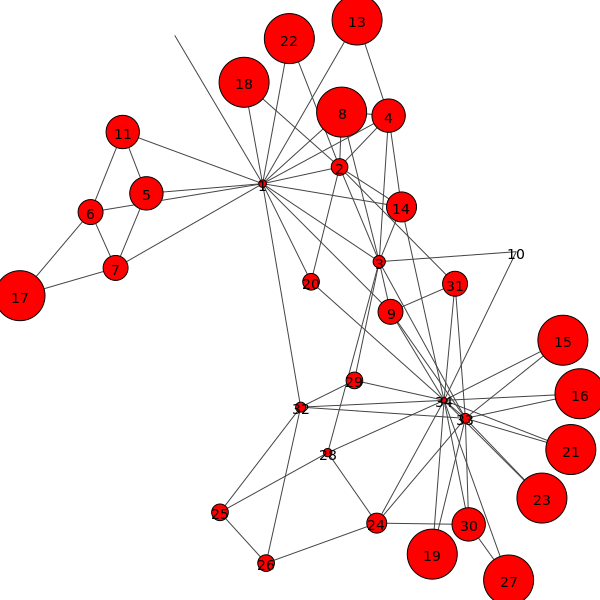

In [75]:
clust = g.transitivity_local_undirected()
vision_settings['vertex_size'] = np.array(clust) * 50
 
plot_graph(g, settings=vision_settings)

In [76]:
avg_clust = g.transitivity_avglocal_undirected()
clust_coeff = g.transitivity_undirected()

print('Средний коэффициент кластеризации: %f' % avg_clust)
print('Глобальный коэффициент кластеризации: %f' % clust_coeff)

Средний коэффициент кластеризации: 0.587931
Глобальный коэффициент кластеризации: 0.255682


# Сеть на основе вселенной Игры Престолов (spoiler alert!)

Рассмотрим две таблички: `characters.csv` и `events.csv`. Названия говорят сами за себя - в  `characters.csv` содержится информация о персонажах серии романов, а в `events.csv` описание событий. Мы будем рассматривать события, которыми славится Игры Престолов - убийства.

В первом файле, помимо индетификатора персонажа (`characterID`), нас будут интересовать поля имени (`Name`) и его группы (`Team`). <br/>
Во втором - события убийства  (`event = killed`) и поле с указанием убитого (`characterID`) и убийцы (`withID`)

#### Задание
* Постройте сеть (направленный граф) убийств персонажей. В каждой вершине должен быть сохранен атрибут имени и группы
* Переиндексируйте идентификаторы вершин начиная с `0` и проиндексируйте группы, тоже начиная с `0`. В функции `assortativity_nominal` требуется, чтобы атрибут был закодирован как число
* Посчитайте коэффициент ассортативности по отношению к атрибуту "группа", который в данном контексте можно интерпретировать как "склонность убивать своих". Проинтерпретируйте полученный результат

In [77]:
df_char = pd.read_csv('./data/characters.csv')
df_events = pd.read_csv('./data/events.csv')

In [78]:
df_events.head()

,chapterID,characterID,event,details,withID,team,title,prefix,Unnamed: 8
0,0,557,mentioned,NaN,NaN,NaN,NaN,NaN,NaN
1,0,808,mentioned,NaN,NaN,NaN,NaN,NaN,NaN
2,0,1045,mentioned,NaN,NaN,NaN,NaN,NaN,NaN
3,0,1434,mentioned,NaN,NaN,NaN,NaN,NaN,NaN
4,0,1808,mentioned,NaN,NaN,NaN,NaN,NaN,NaN


In [79]:
df_char.head()

,characterID,Name,Team,isDead,isCaptured,isHurt,title,prefix
0,2,Addam Marbrand,Lannister,0,0,0,knight,Ser
1,1894,Adrack Humble,Greyjoy,0,0,0,NaN,NaN
2,7,Aegon Frey (Jinglebell),Frey (North),0,0,0,NaN,NaN
3,8,Aegon I Targaryen,Targaryen,1,0,0,King of the Seven Kingdoms,King
4,12,Aegon Targaryen,Targaryen,1,0,0,prince,Prince


In [80]:
df_kill = df_events.query('event == "killed"').loc[:, ['characterID', 'withID']].dropna()
df_kill.loc[:, 'withID'] = df_kill.loc[:, 'withID'].astype(int)

In [81]:
# Оставим только самые частые категории (для наглядности)
teams = ['Stark', 'Night Watch', 'Lannister', 'Robert', 'none', 'Wildlings (north of wall)', 'Greyjoy']

In [82]:
idx = df_char.Team.isin(teams)
df_char = df_char.loc[idx, ['characterID', 'Name', 'Team']]

idx = df_kill.characterID.isin(df_char.characterID) & df_kill.withID.isin(df_char.characterID)
df_kill = df_kill.loc[idx, :]

In [83]:
id_team_mapper = dict(zip(df_char.Team.unique(), range(df_char.Team.nunique())))

In [84]:
id_team_mapper

{'Lannister': 0,
 'Greyjoy': 1,
 'Night Watch': 2,
 'Stark': 3,
 'Wildlings (north of wall)': 4,
 'Robert': 5,
 'none': 6}

In [85]:
idx = ( df_char.characterID.isin(df_kill.characterID) | df_char.characterID.isin(df_kill.withID) )
df_char_kill = df_char.loc[idx, :].reset_index(drop=True)
df_char_kill.loc[:, 'Team'] = df_char_kill.loc[:, 'Team'].replace(id_team_mapper)

In [86]:
df_char_kill.head()

,characterID,Name,Team
0,1894,Adrack Humble,1
1,41,Alebelly,3
2,51,Alfyn,4
3,55,Allar Deem,0
4,136,Arya Stark,3


In [87]:
id_mapper = dict(zip(df_char_kill.characterID.values, df_char_kill.index.values))

In [88]:
df_kill.loc[:, 'characterID'] = df_kill.loc[:, 'characterID'].replace(id_mapper)
df_kill.loc[:, 'withID'] = df_kill.loc[:, 'withID'].replace(id_mapper)

In [89]:
df_kill.head()

,characterID,withID
9,84,82
25,24,21
289,51,69
518,31,28
625,72,75


In [90]:
# Строим граф
g = ig.Graph(n = df_char_kill.shape[0], directed=True, edges=df_kill.loc[:, ['withID', 'characterID']].values.tolist(),
             vertex_attrs=df_char_kill.to_dict(orient='list'))

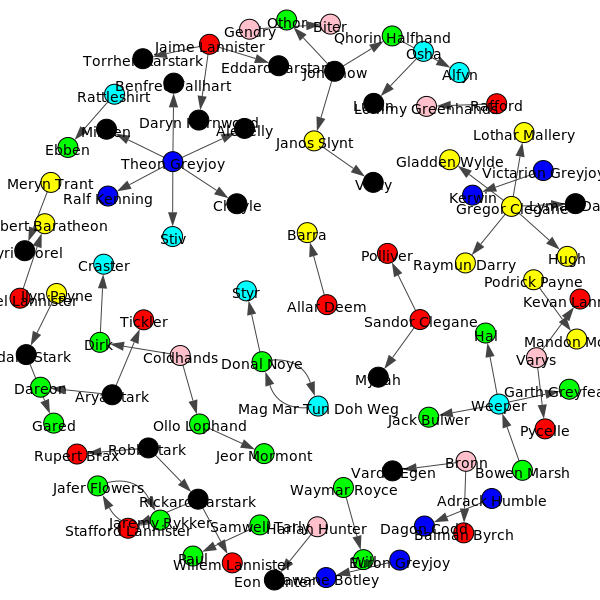

In [91]:
graph_layout = g.layout_kamada_kawai()

df_char_kill.Team.unique()
colors = {0: 'red', 1: 'blue', 2: 'green', 3: 'black', 4: 'cyan', 5: 'yellow', 6: 'pink'}

vision_settings = dict()
vision_settings['layout'] = graph_layout
vision_settings['vertex_label'] = g.vs['Name']
vision_settings['vertex_color'] = [colors[t] for t in  g.vs['Team']]

plot_graph(g, vision_settings)

In [92]:
## Чисто визуально кажется, что все убивают всех =(

Проверить это позволяет коэффициент [ассортативности (модулярности)](https://en.wikipedia.org/wiki/Assortativity)

$$ Q = \frac{1}{2m} \sum\limits_{ij}\left(A_{ij} - \frac{k_i k_j}{2m}\right)\delta(\mathcal{C}_i,\mathcal{C}_j), $$ 

In [93]:
g.assortativity_nominal('Team', directed=True)

0.15575916230366493

In [95]:
# Коэффициент ассортативности это подтверждает

# Схожесть вершин, выявление сообществ

Понятие **"эквивалетности"** вершин можно ославить до **"схожести"** вершин - некоторая мера структурной близости вершин. 

Наиболее распространенные практиеские применения мер сходства:
* Выявление сообществ
* Предсказание связей

## Примеры мер сходства

#### Jaccard Similarity
$$ s(v_i, v_j) = \frac{|N(v_i) \cap N(v_j)|}{|N(v_i) \cup N(v_j)|} $$

#### Cosine Similarity
$$ s(v_i, v_j) = \frac{\langle A_{i \cdot}, A_{j \cdot} \rangle}{\sqrt{\sum_k A^2_{ik}} \sqrt{\sum_k A^2_{jk}}} $$

#### Correlation
$$ s(v_i, v_j) = \frac{\sum_k (A_{ik} - \bar{A}_{i\cdot}) (A_{jk} - \bar{A}_{j\cdot})}{\sqrt{\sum_k (A_{ik} - \bar{A}_{i\cdot})^2} \sqrt{\sum_k (A_{jk} - \bar{A}_{j\cdot})^2}} $$

#### Adamic-Adar Score
$$ s(v_i, v_j) = \sum\limits_{z \in N(v_i) \cap N(v_j)} \frac{1}{\log(|N(z)|)} $$

#### Preferential Attachment Score
$$ s(v_i, v_j) = |N(v_i)| \cdot |N(v_j)| $$

## Выявление сообществ

#### Задание
* Загрузим граф из `nested_partition.gml`. Это граф, построенный с помощью [генератора](https://sites.google.com/site/santofortunato/inthepress2) Benchmark сетей для тестов алгоритмов выявления сообществ.
* Визуализируем матрицу смежности графа с помощью метода `plt.spy(A)` (и саму сеть, если получится)
* Рассчитаем реализованные в `igraph` меры схожести вершин: `similarity_jaccard` и `similarity_inverse_log_weighted`. Визуализируйте полученный результат

По большому счету, полученные схожести можно подавать на вход любому алгоритму кластеризации, который изначально может работать со мерами близости (например аггломеративная кластеризация)

In [96]:
g = ig.Graph.Read_GML('data/nested_partition.gml')

In [97]:
g.summary()

'IGRAPH U--- 128 1024 -- \n+ attr: id (v), label (v)'

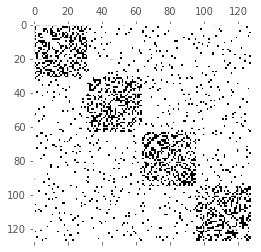

In [98]:
A = g.get_adjacency()
A = np.array(A.data)
plt.spy(A)

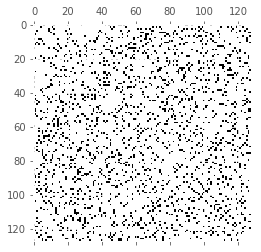

In [99]:
# Что бы мы увидили в реальной жизни
idx = np.random.permutation(range(128))
i = np.ix_(idx, idx)
plt.spy(A[i])

In [100]:
D = g.similarity_jaccard()
# D = g.similarity_inverse_log_weighted()

# Потому что нам нужно не сходство а расстояние
D = 1 - np.array(D)

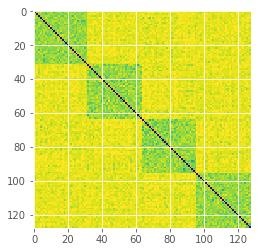

In [101]:
plt.imshow(D)

In [102]:
# Попробуем посчитать на этой матрице рассстойний иерархическую кластеризацию
from scipy.cluster.hierarchy import dendrogram, fcluster, linkage
from scipy.spatial.distance import squareform, pdist

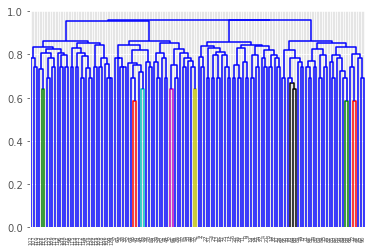

In [103]:
d = squareform(D) # преобразование матрицы в вектор расстояний
Z = linkage(d, method='average')
dend = dendrogram(Z)
labels = fcluster(Z, 4, criterion='maxclust')

## Community Detection

####  Задание
В igraph реализовано довольно много методов выявления сообществ. Все реализации начинаются с `community_`. 

* Выберите один из изученных на лекции алгоритмов и оцените его качество с помощью ARI.
* ARI реализовано в ig.compare_communities()

In [110]:
# Измерием сходство с истинного разбиения и того, что получили выше через ARI
ig.compare_communities(labels, g.vs['label'], method='rand')

1.0

In [105]:
# Теперь перейдем к алгоритмам community detection, например EdgeBetweenneess
edg_betw_res = g.community_edge_betweenness()

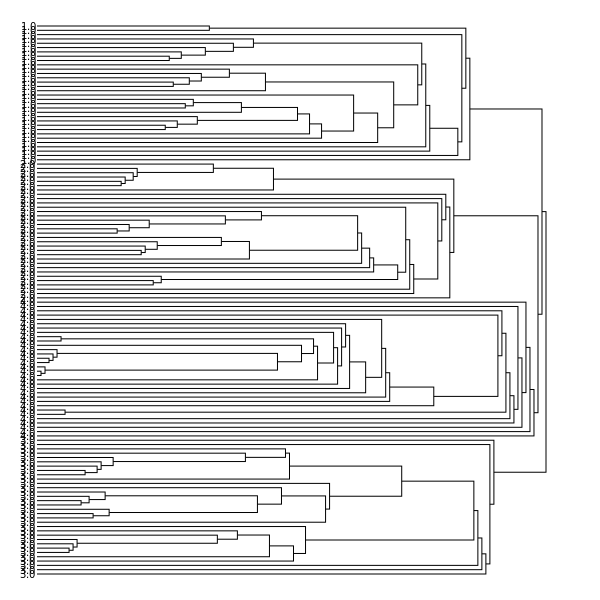

In [106]:
# Можно нарисовать дендрограмму
plot_graph(edg_betw_res)

In [107]:
# Получим разбиение на кластеры, задав число кластеров руками
edg_betw_clust = edg_betw_res.as_clustering(n=5)
labels = edg_betw_clust.membership

print(np.unique(labels))
print('Modularity = %f' % (g.modularity(labels)))

[0 1 2 3 4]
Modularity = 0.447144


In [108]:
# Получим разбиение на кластеры, выбрав оптимальное по критерию модулярности
edg_betw_clust = edg_betw_res.as_clustering()
labels = edg_betw_clust.membership

print(np.unique(labels))
print('Modularity = %f' % (g.modularity(labels)))

[0 1 2 3]
Modularity = 0.453125


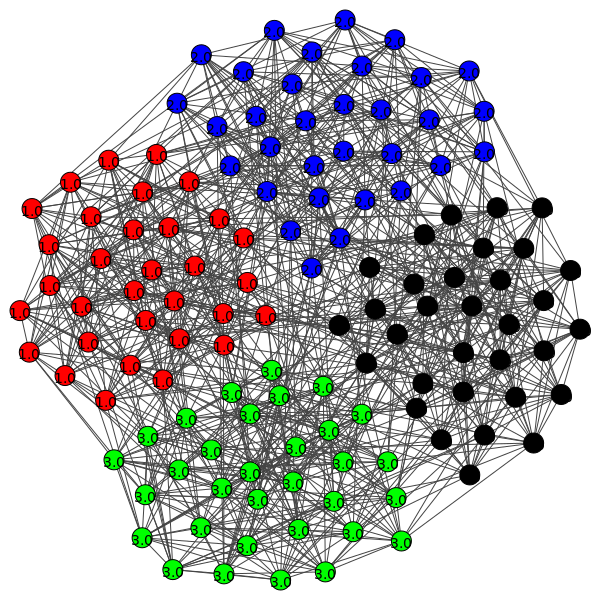

In [109]:
graph_layout = g.layout_graphopt()

df_char_kill.Team.unique()
colors = {0: 'red', 1: 'blue', 2: 'green', 3: 'black', 4: 'cyan', 5: 'yellow', 6: 'pink'}

vision_settings = dict()
vision_settings['layout'] = graph_layout
vision_settings['vertex_color'] = [colors[l] for l in  labels]

plot_graph(g, vision_settings)

* [Курс по соц-сетям от Л. Жукова](http://leonidzhukov.net/hse/2014/socialnetworks/)
* [Курс со соц-сетям от Stanford](http://web.stanford.edu/class/cs224w/index.html)